# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 3

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'D:\\Users\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_9L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_21L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_7L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_9L.bmp',
   'D:\\Users\\Chuan\\Document

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'D:\\Users\\Chuan\\Docume

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  3
chr_09
   Train: 
        193002-9p12q13_11L.bmp
        193002-9p12q13_12L.bmp
        193002-9p12q13_13L.bmp
        193002-9p12q13_15L.bmp
        193002-9p12q13_16L.bmp
        193002-9p12q13_17L.bmp
        193002-9p12q13_18L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_2L.bmp
        193002-9p12q13_3L.bmp
        193002-9p12q13_4L.bmp
        193002-9p12q13_5L.bmp
        193002-9p12q13_7L.bmp
        193002-9p12q13_8L.bmp
        193002-9p12q13_9L.bmp
        W07391-9p12q_10L.bmp
        W07391-9p12q_11L.bmp
        W07391-9p12q_12L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_16L.bmp
        W07391-9p12q_18L.bmp
        W07391-9p12q_19L.bmp
        W07391-9p12q_1L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_21L.bmp
        W07391-9p12q_2L.bmp
        W07391-9p12q_3L.bmp
        W07391-9p12q_4L.bmp
        W07391-9p12q_5L.bmp
        W07391-9p12q_6L.bmp
        W07391-9p12q_7L.bmp
        W07391-9p12q_9L.bmp
        W15206-_9p12q_

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

347

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
start = time.time()

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
6/6 [==============================] - 5s 466ms/step - loss: 1288.4164 - accuracy: 0.5476 - val_loss: 122.3851 - val_accuracy: 0.3953
Epoch 2/500
6/6 [==============================] - 1s 128ms/step - loss: 50.4455 - accuracy: 0.4582 - val_loss: 13.9542 - val_accuracy: 0.6047
Epoch 3/500
6/6 [==============================] - 1s 112ms/step - loss: 4.0409 - accuracy: 0.6542 - val_loss: 7.1339 - val_accuracy: 0.3953
Epoch 4/500
6/6 [==============================] - 1s 113ms/step - loss: 1.9174 - accuracy: 0.7493 - val_loss: 0.3698 - val_accuracy: 0.8140
Epoch 5/500
6/6 [==============================] - 1s 114ms/step - loss: 0.8355 - accuracy: 0.7089 - val_loss: 0.7997 - val_accuracy: 0.6860
Epoch 6/500
6/6 [==============================] - 1s 147ms/step - loss: 0.4448 - accuracy: 0.8473 - val_loss: 0.2201 - val_accuracy: 0.9302
Epoch 7/500
6/6 [==============================] - 1s 116ms/step - loss: 0.1933 - accuracy: 0.9251 - val_loss: 0.3244 - val_accuracy: 0.8372
Epoch 

6/6 [==============================] - 1s 113ms/step - loss: 7.4452e-06 - accuracy: 1.0000 - val_loss: 0.2351 - val_accuracy: 0.9419
Epoch 58/500
6/6 [==============================] - 1s 114ms/step - loss: 7.1505e-06 - accuracy: 1.0000 - val_loss: 0.2357 - val_accuracy: 0.9419
Epoch 59/500
6/6 [==============================] - 1s 115ms/step - loss: 6.8540e-06 - accuracy: 1.0000 - val_loss: 0.2369 - val_accuracy: 0.9419
Epoch 60/500
6/6 [==============================] - 1s 112ms/step - loss: 6.5682e-06 - accuracy: 1.0000 - val_loss: 0.2382 - val_accuracy: 0.9419
Epoch 61/500
6/6 [==============================] - 1s 114ms/step - loss: 6.2859e-06 - accuracy: 1.0000 - val_loss: 0.2387 - val_accuracy: 0.9419
Epoch 62/500
6/6 [==============================] - 1s 116ms/step - loss: 6.0272e-06 - accuracy: 1.0000 - val_loss: 0.2392 - val_accuracy: 0.9419
Epoch 63/500
6/6 [==============================] - 1s 115ms/step - loss: 5.7826e-06 - accuracy: 1.0000 - val_loss: 0.2398 - val_accuracy

6/6 [==============================] - 1s 116ms/step - loss: 1.1179e-06 - accuracy: 1.0000 - val_loss: 0.2678 - val_accuracy: 0.9535
Epoch 114/500
6/6 [==============================] - 1s 113ms/step - loss: 1.0942e-06 - accuracy: 1.0000 - val_loss: 0.2680 - val_accuracy: 0.9535
Epoch 115/500
6/6 [==============================] - 1s 116ms/step - loss: 1.0667e-06 - accuracy: 1.0000 - val_loss: 0.2685 - val_accuracy: 0.9535
Epoch 116/500
6/6 [==============================] - 1s 114ms/step - loss: 1.0430e-06 - accuracy: 1.0000 - val_loss: 0.2687 - val_accuracy: 0.9535
Epoch 117/500
6/6 [==============================] - 1s 114ms/step - loss: 1.0179e-06 - accuracy: 1.0000 - val_loss: 0.2692 - val_accuracy: 0.9535
Epoch 118/500
6/6 [==============================] - 1s 115ms/step - loss: 9.9420e-07 - accuracy: 1.0000 - val_loss: 0.2700 - val_accuracy: 0.9535
Epoch 119/500
6/6 [==============================] - 1s 117ms/step - loss: 9.7600e-07 - accuracy: 1.0000 - val_loss: 0.2701 - val_ac

Epoch 169/500
6/6 [==============================] - 1s 114ms/step - loss: 3.8133e-07 - accuracy: 1.0000 - val_loss: 0.2897 - val_accuracy: 0.9535
Epoch 170/500
6/6 [==============================] - 2s 417ms/step - loss: 3.7446e-07 - accuracy: 1.0000 - val_loss: 0.2902 - val_accuracy: 0.9535
Epoch 171/500
6/6 [==============================] - 1s 115ms/step - loss: 3.6828e-07 - accuracy: 1.0000 - val_loss: 0.2903 - val_accuracy: 0.9535
Epoch 172/500
6/6 [==============================] - 1s 116ms/step - loss: 3.6381e-07 - accuracy: 1.0000 - val_loss: 0.2906 - val_accuracy: 0.9535
Epoch 173/500
6/6 [==============================] - 1s 116ms/step - loss: 3.5728e-07 - accuracy: 1.0000 - val_loss: 0.2912 - val_accuracy: 0.9535
Epoch 174/500
6/6 [==============================] - 1s 114ms/step - loss: 3.5144e-07 - accuracy: 1.0000 - val_loss: 0.2919 - val_accuracy: 0.9535
Epoch 175/500
6/6 [==============================] - 1s 116ms/step - loss: 3.4732e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 225/500
6/6 [==============================] - 1s 115ms/step - loss: 1.8586e-07 - accuracy: 1.0000 - val_loss: 0.3049 - val_accuracy: 0.9535
Epoch 226/500
6/6 [==============================] - 1s 114ms/step - loss: 1.8414e-07 - accuracy: 1.0000 - val_loss: 0.3053 - val_accuracy: 0.9535
Epoch 227/500
6/6 [==============================] - 1s 115ms/step - loss: 1.8208e-07 - accuracy: 1.0000 - val_loss: 0.3057 - val_accuracy: 0.9535
Epoch 228/500
6/6 [==============================] - 1s 112ms/step - loss: 1.8105e-07 - accuracy: 1.0000 - val_loss: 0.3061 - val_accuracy: 0.9535
Epoch 229/500
6/6 [==============================] - 1s 113ms/step - loss: 1.7795e-07 - accuracy: 1.0000 - val_loss: 0.3064 - val_accuracy: 0.9535
Epoch 230/500
6/6 [==============================] - 1s 114ms/step - loss: 1.7555e-07 - accuracy: 1.0000 - val_loss: 0.3064 - val_accuracy: 0.9535
Epoch 231/500
6/6 [==============================] - 1s 116ms/step - loss: 1.7418e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 281/500
6/6 [==============================] - 1s 120ms/step - loss: 1.0684e-07 - accuracy: 1.0000 - val_loss: 0.3168 - val_accuracy: 0.9535
Epoch 282/500
6/6 [==============================] - 1s 123ms/step - loss: 1.0581e-07 - accuracy: 1.0000 - val_loss: 0.3170 - val_accuracy: 0.9535
Epoch 283/500
6/6 [==============================] - 1s 121ms/step - loss: 1.0512e-07 - accuracy: 1.0000 - val_loss: 0.3173 - val_accuracy: 0.9535
Epoch 284/500
6/6 [==============================] - 1s 121ms/step - loss: 1.0409e-07 - accuracy: 1.0000 - val_loss: 0.3175 - val_accuracy: 0.9535
Epoch 285/500
6/6 [==============================] - 1s 130ms/step - loss: 1.0375e-07 - accuracy: 1.0000 - val_loss: 0.3175 - val_accuracy: 0.9535
Epoch 286/500
6/6 [==============================] - 1s 122ms/step - loss: 1.0306e-07 - accuracy: 1.0000 - val_loss: 0.3177 - val_accuracy: 0.9535
Epoch 287/500
6/6 [==============================] - 1s 122ms/step - loss: 1.0238e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 337/500
6/6 [==============================] - 1s 118ms/step - loss: 6.8708e-08 - accuracy: 1.0000 - val_loss: 0.3258 - val_accuracy: 0.9535
Epoch 338/500
6/6 [==============================] - 1s 121ms/step - loss: 6.8365e-08 - accuracy: 1.0000 - val_loss: 0.3261 - val_accuracy: 0.9535
Epoch 339/500
6/6 [==============================] - 1s 117ms/step - loss: 6.8365e-08 - accuracy: 1.0000 - val_loss: 0.3261 - val_accuracy: 0.9535
Epoch 340/500
6/6 [==============================] - 1s 121ms/step - loss: 6.7334e-08 - accuracy: 1.0000 - val_loss: 0.3263 - val_accuracy: 0.9535
Epoch 341/500
6/6 [==============================] - 1s 121ms/step - loss: 6.7334e-08 - accuracy: 1.0000 - val_loss: 0.3266 - val_accuracy: 0.9535
Epoch 342/500
6/6 [==============================] - 1s 119ms/step - loss: 6.6991e-08 - accuracy: 1.0000 - val_loss: 0.3268 - val_accuracy: 0.9535
Epoch 343/500
6/6 [==============================] - 1s 120ms/step - loss: 6.6304e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 393/500
6/6 [==============================] - 1s 122ms/step - loss: 4.7065e-08 - accuracy: 1.0000 - val_loss: 0.3353 - val_accuracy: 0.9535
Epoch 394/500
6/6 [==============================] - 1s 121ms/step - loss: 4.6722e-08 - accuracy: 1.0000 - val_loss: 0.3355 - val_accuracy: 0.9535
Epoch 395/500
6/6 [==============================] - 1s 119ms/step - loss: 4.6722e-08 - accuracy: 1.0000 - val_loss: 0.3357 - val_accuracy: 0.9535
Epoch 396/500
6/6 [==============================] - 1s 124ms/step - loss: 4.6722e-08 - accuracy: 1.0000 - val_loss: 0.3358 - val_accuracy: 0.9535
Epoch 397/500
6/6 [==============================] - 1s 118ms/step - loss: 4.6378e-08 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 0.9535
Epoch 398/500
6/6 [==============================] - 1s 119ms/step - loss: 4.5348e-08 - accuracy: 1.0000 - val_loss: 0.3362 - val_accuracy: 0.9535
Epoch 399/500
6/6 [==============================] - 1s 120ms/step - loss: 4.4661e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 449/500
6/6 [==============================] - 1s 121ms/step - loss: 3.3667e-08 - accuracy: 1.0000 - val_loss: 0.3430 - val_accuracy: 0.9535
Epoch 450/500
6/6 [==============================] - 1s 122ms/step - loss: 3.3667e-08 - accuracy: 1.0000 - val_loss: 0.3429 - val_accuracy: 0.9535
Epoch 451/500
6/6 [==============================] - 1s 117ms/step - loss: 3.3324e-08 - accuracy: 1.0000 - val_loss: 0.3431 - val_accuracy: 0.9535
Epoch 452/500
6/6 [==============================] - 1s 122ms/step - loss: 3.2980e-08 - accuracy: 1.0000 - val_loss: 0.3433 - val_accuracy: 0.9535
Epoch 453/500
6/6 [==============================] - 1s 121ms/step - loss: 3.2980e-08 - accuracy: 1.0000 - val_loss: 0.3434 - val_accuracy: 0.9535
Epoch 454/500
6/6 [==============================] - 1s 121ms/step - loss: 3.2980e-08 - accuracy: 1.0000 - val_loss: 0.3435 - val_accuracy: 0.9535
Epoch 455/500
6/6 [==============================] - 1s 120ms/step - loss: 3.2637e-08 - accuracy: 1.0000 - val_loss: 0

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 9276), started 4:16:39 ago. (Use '!kill 9276' to kill it.)

In [35]:
end = time.time()
print('Time elapsed: ', (end - start)/60, ' minutes.')

Time elapsed:  42.275666908423105  minutes.


## 3.8 Save the Model

In [36]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_3\assets


## 3.9 Load the Model

In [37]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [38]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.953


In [39]:
len(X_test)

86

In [40]:
y_predict = model_reload.predict(X_test)

In [41]:
len(y_predict)

86

In [42]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [43]:
len(y_predict_filtered)

86

In [44]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [45]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [46]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [47]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [48]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
y_predict

array([[1.00000000e+00, 1.44450825e-08],
       [1.00000000e+00, 4.42354704e-08],
       [1.00000000e+00, 4.42845050e-09],
       [1.00000000e+00, 8.61740401e-11],
       [9.99971986e-01, 2.61296445e-05],
       [9.77594435e-01, 3.17165665e-02],
       [9.99998212e-01, 1.84627925e-06],
       [9.99999881e-01, 3.60638843e-08],
       [9.99996185e-01, 2.31690501e-06],
       [9.99999762e-01, 2.01880198e-07],
       [9.99994874e-01, 5.98471615e-06],
       [1.00000000e+00, 8.68663128e-11],
       [9.99999166e-01, 5.54409837e-07],
       [1.00000000e+00, 4.46585657e-09],
       [1.00000000e+00, 1.32038744e-08],
       [9.45320845e-01, 9.68085323e-03],
       [1.64827183e-01, 6.67538166e-01],
       [9.85950410e-01, 2.07381174e-02],
       [9.99999881e-01, 2.09316056e-07],
       [1.25120087e-02, 9.19748068e-01],
       [9.99992490e-01, 2.33745618e-06],
       [9.99970317e-01, 2.56642743e-05],
       [9.95697141e-01, 3.65803856e-03],
       [9.99999285e-01, 4.14995498e-07],
       [9.999917

### 3.10.2. Classification Report

In [51]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.98      0.94      0.96        52
chr_9_inversion       0.92      0.97      0.94        34

      micro avg       0.95      0.95      0.95        86
      macro avg       0.95      0.96      0.95        86
   weighted avg       0.95      0.95      0.95        86



### 3.10.3. Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,49,3
chr_9_inversion,1,33


#### Heat Map

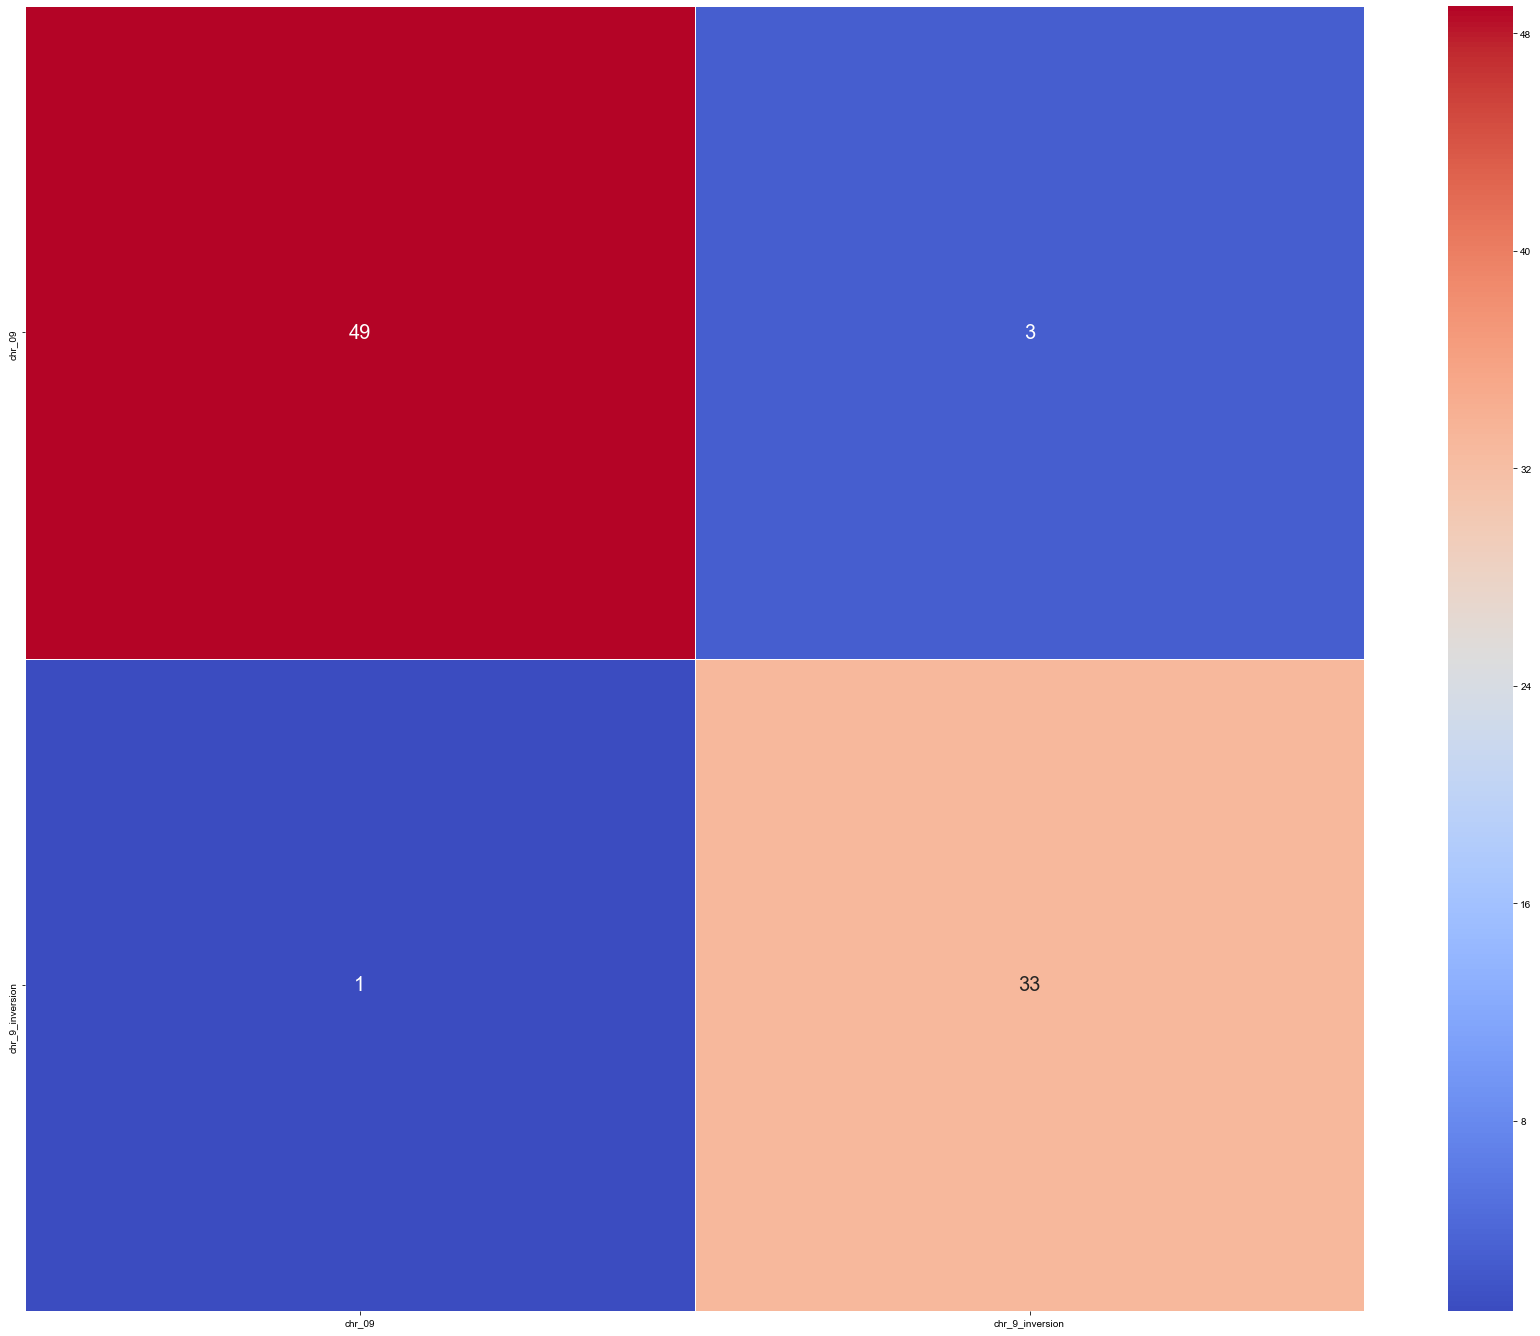

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [55]:
y_predict

array([[1.00000000e+00, 1.44450825e-08],
       [1.00000000e+00, 4.42354704e-08],
       [1.00000000e+00, 4.42845050e-09],
       [1.00000000e+00, 8.61740401e-11],
       [9.99971986e-01, 2.61296445e-05],
       [9.77594435e-01, 3.17165665e-02],
       [9.99998212e-01, 1.84627925e-06],
       [9.99999881e-01, 3.60638843e-08],
       [9.99996185e-01, 2.31690501e-06],
       [9.99999762e-01, 2.01880198e-07],
       [9.99994874e-01, 5.98471615e-06],
       [1.00000000e+00, 8.68663128e-11],
       [9.99999166e-01, 5.54409837e-07],
       [1.00000000e+00, 4.46585657e-09],
       [1.00000000e+00, 1.32038744e-08],
       [9.45320845e-01, 9.68085323e-03],
       [1.64827183e-01, 6.67538166e-01],
       [9.85950410e-01, 2.07381174e-02],
       [9.99999881e-01, 2.09316056e-07],
       [1.25120087e-02, 9.19748068e-01],
       [9.99992490e-01, 2.33745618e-06],
       [9.99970317e-01, 2.56642743e-05],
       [9.95697141e-01, 3.65803856e-03],
       [9.99999285e-01, 4.14995498e-07],
       [9.999917

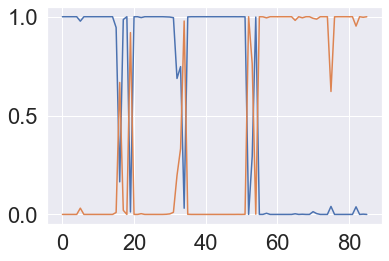

In [56]:
plt.plot(y_predict)

In [57]:
y_predict_1D = y_predict[:,0]

In [58]:
y_predict_1D_processed = 1- y_predict_1D

In [59]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [60]:
auc_rf

0.9898190045248869

In [61]:
x = y = np.arange(0,1.1,0.1)

In [62]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

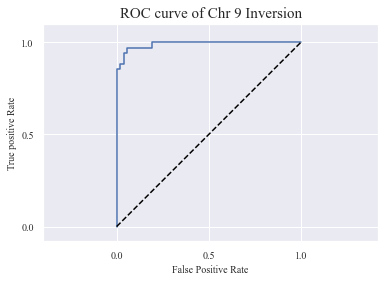

In [63]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr 9 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [64]:
auc_value = auc(fpr, tpr)

In [65]:
print('AUC is ', auc_value)

AUC is  0.9898190045248869


# Results

In [66]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.953


In [67]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.98      0.94      0.96        52
chr_9_inversion       0.92      0.97      0.94        34

      micro avg       0.95      0.95      0.95        86
      macro avg       0.95      0.96      0.95        86
   weighted avg       0.95      0.95      0.95        86



In [68]:
type(performanceReport)

str

In [69]:
confusion

,chr_09,chr_9_inversion
chr_09,49,3
chr_9_inversion,1,33


In [70]:
print('AUC is ', auc_value)

AUC is  0.9898190045248869


## Export to a text file

In [71]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()